In [29]:
data = "This course starts with the configuration and the installation of all resources needed including the installation of Tensor Flow CPU/GPU, Cuda and Keras. You will be able to use your GPU card if you have one, to accelate so fast the processes. But if you dont have a GPU card you can follow the instructions for running the standard CPU code, it will take a while but you still can run it.After that we are going to review the main concepts of Deep Learning in the Chapter 2 for applying them into the Natural Language Processing field offering you a solid background for the main chapter.In the main Chapter 3 we are going to study the main Deep Learning libraries and models for NLP such as Word Embeddings, Word2Vec, Glove, FastText, Universal Sentence Encoder, RNN, GRU, LSTM, Convolutions in 1D, Seq2Seq, Memory Networks, and the Attention mechanism.This course offers you many examples, with different datasets suchs as Google News, Yelp comments, Amazon reviews, IMDB reviews, the Bible corpus, etc and different text corpus. At the final in Chapter 4 you will put in practice your knowledge with practical applications such as Multiclass Sentiment Analysis, Text Generation, Machine Translation, Developing a ChatBot and more. For coding we are going to use TensorFlow, Keras, Google Colab and many Python libraries.If you need a previous background in Natural Language Processing or in Machine Learning I recommend you my courses:Python for Machine Learning and Data Mining  or Natural Language Processing with Python and NLTK Who this course is for:Professionals looking for an advanced course of Natural Language Processing using Deep Learning approach"

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding ,LSTM,Dense,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [31]:
tokenizer = Tokenizer()

In [32]:
corpus = data.lower().split('\n')

In [33]:
tokenizer.fit_on_texts(corpus)

In [34]:
total_words = len(tokenizer.word_index)+1

In [35]:
print(tokenizer.word_index)

{'the': 1, 'you': 2, 'and': 3, 'for': 4, 'in': 5, 'to': 6, 'a': 7, 'learning': 8, 'course': 9, 'with': 10, 'of': 11, 'main': 12, 'chapter': 13, 'natural': 14, 'language': 15, 'processing': 16, 'this': 17, 'gpu': 18, 'will': 19, 'if': 20, 'we': 21, 'are': 22, 'going': 23, 'deep': 24, 'as': 25, 'machine': 26, 'python': 27, 'installation': 28, 'cpu': 29, 'keras': 30, 'use': 31, 'your': 32, 'card': 33, 'have': 34, 'but': 35, 'can': 36, 'it': 37, 'background': 38, 'libraries': 39, 'such': 40, 'many': 41, 'different': 42, 'google': 43, 'reviews': 44, 'corpus': 45, 'text': 46, 'or': 47, 'starts': 48, 'configuration': 49, 'all': 50, 'resources': 51, 'needed': 52, 'including': 53, 'tensor': 54, 'flow': 55, 'cuda': 56, 'be': 57, 'able': 58, 'one': 59, 'accelate': 60, 'so': 61, 'fast': 62, 'processes': 63, 'dont': 64, 'follow': 65, 'instructions': 66, 'running': 67, 'standard': 68, 'code': 69, 'take': 70, 'while': 71, 'still': 72, 'run': 73, 'after': 74, 'that': 75, 'review': 76, 'concepts': 77, 

In [36]:
print(total_words)

154


In [37]:
input_sequences = []

In [38]:
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [39]:
token_list

[17,
 9,
 48,
 10,
 1,
 49,
 3,
 1,
 28,
 11,
 50,
 51,
 52,
 53,
 1,
 28,
 11,
 54,
 55,
 29,
 18,
 56,
 3,
 30,
 2,
 19,
 57,
 58,
 6,
 31,
 32,
 18,
 33,
 20,
 2,
 34,
 59,
 6,
 60,
 61,
 62,
 1,
 63,
 35,
 20,
 2,
 64,
 34,
 7,
 18,
 33,
 2,
 36,
 65,
 1,
 66,
 4,
 67,
 1,
 68,
 29,
 69,
 37,
 19,
 70,
 7,
 71,
 35,
 2,
 72,
 36,
 73,
 37,
 74,
 75,
 21,
 22,
 23,
 6,
 76,
 1,
 12,
 77,
 11,
 24,
 8,
 5,
 1,
 13,
 78,
 4,
 79,
 80,
 81,
 1,
 14,
 15,
 16,
 82,
 83,
 2,
 7,
 84,
 38,
 4,
 1,
 12,
 13,
 5,
 1,
 12,
 13,
 85,
 21,
 22,
 23,
 6,
 86,
 1,
 12,
 24,
 8,
 39,
 3,
 87,
 4,
 88,
 40,
 25,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 5,
 101,
 102,
 103,
 104,
 3,
 1,
 105,
 106,
 17,
 9,
 107,
 2,
 41,
 108,
 10,
 42,
 109,
 110,
 25,
 43,
 111,
 112,
 113,
 114,
 44,
 115,
 44,
 1,
 116,
 45,
 117,
 3,
 42,
 46,
 45,
 118,
 1,
 119,
 5,
 13,
 120,
 2,
 19,
 121,
 5,
 122,
 32,
 123,
 10,
 124,
 125,
 40,
 25,
 126,
 127,
 128,
 46,
 129,
 26,
 130,
 131,
 

In [40]:
input_sequences

[[17, 9],
 [17, 9, 48],
 [17, 9, 48, 10],
 [17, 9, 48, 10, 1],
 [17, 9, 48, 10, 1, 49],
 [17, 9, 48, 10, 1, 49, 3],
 [17, 9, 48, 10, 1, 49, 3, 1],
 [17, 9, 48, 10, 1, 49, 3, 1, 28],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11, 50],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11, 50, 51],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11, 50, 51, 52],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11, 50, 51, 52, 53],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11, 50, 51, 52, 53, 1],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11, 50, 51, 52, 53, 1, 28],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11, 50, 51, 52, 53, 1, 28, 11],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11, 50, 51, 52, 53, 1, 28, 11, 54],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11, 50, 51, 52, 53, 1, 28, 11, 54, 55],
 [17, 9, 48, 10, 1, 49, 3, 1, 28, 11, 50, 51, 52, 53, 1, 28, 11, 54, 55, 29],
 [17,
  9,
  48,
  10,
  1,
  49,
  3,
  1,
  28,
  11,
  50,
  51,
  52,
  53,
  1,
  28,
  11,
  54,
  55,
  29,
  18],
 [17,
  9,
  48,
  10,
  1,
  49,
  3,
  1,
  28,
  1

In [41]:
max_sequence_len = max([len(x) for x in input_sequences])

In [42]:
input_sequences = np.array(pad_sequences(input_sequences,maxlen = max_sequence_len,padding='pre'))

In [43]:
xs,labels = input_sequences[:,:-1],input_sequences[:,-1]

In [44]:
ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [45]:
model = Sequential()

In [46]:
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [47]:
history = model.fit(xs,ys,epochs = 10,verbose = 1)

Train on 274 samples
Epoch 1/10
274/274 [==============================] - 9s 33ms/sample - loss: 5.0350 - accuracy: 0.0219
Epoch 2/10
274/274 [==============================] - 2s 6ms/sample - loss: 5.0189 - accuracy: 0.0511
Epoch 3/10
274/274 [==============================] - 2s 6ms/sample - loss: 4.9979 - accuracy: 0.0547
Epoch 4/10
274/274 [==============================] - 2s 6ms/sample - loss: 4.9615 - accuracy: 0.0547
Epoch 5/10
274/274 [==============================] - 2s 6ms/sample - loss: 4.9073 - accuracy: 0.0547
Epoch 6/10
274/274 [==============================] - 2s 6ms/sample - loss: 4.8369 - accuracy: 0.0584
Epoch 7/10
274/274 [==============================] - 2s 6ms/sample - loss: 4.7850 - accuracy: 0.0547
Epoch 8/10
274/274 [==============================] - 2s 6ms/sample - loss: 4.7508 - accuracy: 0.0547
Epoch 9/10
274/274 [==============================] - 2s 6ms/sample - loss: 4.7158 - accuracy: 0.0547
Epoch 10/10
274/274 [==============================] - 2s 6m

In [48]:
import matplotlib.pyplot as plt

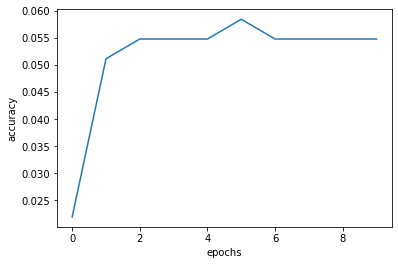

In [49]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history,'accuracy')

In [50]:
seed_text = 'lawrance went to dublin'
next_words = 100

In [53]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted = model.predict_classes(token_list,verbose=0)
#     print(predicted)
    output_word = ""
for word,index in tokenizer.word_index.items():
    if index == predicted:
        output_word = word
        break
seed_text+=" "+output_word
print(seed_text)

lawrance went to dublin the the


In [54]:
token_list

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 6, 1]])